In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scraping with Selenium

In [10]:
all_data = []
driver = webdriver.Chrome()

In [ ]:
for page in range (1,101):
    website = f'https://bina.az/baki/alqi-satqi/menziller?page={page}'
    driver.get(website)
    WebDriverWait(driver, 20).until(EC.presence_of_all_elements_located((By.XPATH, "//a[@class='item_link']")))
    WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, "item_link")))

    
    elements = driver.find_elements(By.XPATH, "//a[@class='item_link']")
    
    links = set()

    for element in elements:
        href = element.get_attribute('href')
        if href:
            links.add(href)
            
            
    
    for href in links:
        old_tabs = driver.window_handles
        
        driver.execute_script("window.open(arguments[0]);", href)
        WebDriverWait(driver, 10).until(lambda d: len(d.window_handles) > len(old_tabs))
        
        new_tab = [tab for tab in driver.window_handles if tab not in old_tabs][0]
        driver.switch_to.window(new_tab)
        WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, "product-properties__i")))

        
        
        data = {"link": href}
        
        
        props = driver.find_elements(By.CLASS_NAME, "product-properties__i")
        
        for prop in props:
            try:
                name = prop.find_element(By.CLASS_NAME, "product-properties__i-name").text.strip()
                value = prop.find_element(By.CLASS_NAME, "product-properties__i-value").text.strip()
                data[name] = value if value else np.nan
            except Exception as e:
                continue

                
        prices = driver.find_elements(By.CLASS_NAME, "product-price__i")
        date = driver.find_elements(By.CLASS_NAME, "product-statistics__i-text")
        address = driver.find_element(By.CLASS_NAME, "product-title")
        
        data['Price'] = prices[0].text.strip()
        data['Price_per_sqm'] = prices[1].text.strip()
        data['Date'] = date[1].text.strip()
        data['Address'] = address.text.strip()
            
        all_data.append(data)

        driver.close()
        driver.switch_to.window(driver.window_handles[0])
        
df = pd.DataFrame(all_data)
df.to_csv("bina_az_satish_elanlari.csv", index=False, encoding='utf-8-sig')
driver.quit()

In [6]:
df

,link,Kateqoriya,Mərtəbə,Sahə,Otaq sayı,Çıxarış,Təmir,Price,Price per sqm,Date,Address,İpoteka
0,https://bina.az/items/5239521,Köhnə tikili,9 / 9,46 m²,1,var,var,108 000AZN,2 350 AZN/m²,"Yeniləndi: 14.06.2025, 22:05","Satılır 1 otaqlı köhnə tikili 46 m², Nəsimi m.",NaN
1,https://bina.az/items/5229495,Yeni tikili,15 / 16,90 m²,3,yoxdur,var,207 000AZN,2 300 AZN/m²,"Yeniləndi: 14.06.2025, 22:03","Satılır 3 otaqlı yeni tikili 90 m², Qara Qaray...",NaN
2,https://bina.az/items/4037121,Yeni tikili,19 / 19,100 m²,3,var,var,260 000AZN,2 600 AZN/m²,"Yeniləndi: 14.06.2025, 22:10","Satılır 3 otaqlı yeni tikili 100 m², Nərimanov r.",NaN
3,https://bina.az/items/5270367,Köhnə tikili,5 / 5,55 m²,2,var,var,115 000AZN,2 090 AZN/m²,"Yeniləndi: 14.06.2025, 22:06","Satılır 2 otaqlı köhnə tikili 55 m², Memar Əcə...",NaN
4,https://bina.az/items/5273153,Yeni tikili,9 / 10,71 m²,3,var,var,135 000AZN,1 900 AZN/m²,"Yeniləndi: 14.06.2025, 11:52","Satılır 3 otaqlı yeni tikili 71 m², Yeni Raman...",var
...,...,...,...,...,...,...,...,...,...,...,...,...
79,https://bina.az/items/5222061,Yeni tikili,12 / 16,121 m²,3,var,var,315 000AZN,2 600 AZN/m²,"Yeniləndi: 14.06.2025, 21:27","Satılır 3 otaqlı yeni tikili 121 m², Şah İsmay...",var
80,https://bina.az/items/5196974,Yeni tikili,11 / 17,68 m²,2,var,var,310 000AZN,4 560 AZN/m²,"Yeniləndi: 14.06.2025, 21:27","Satılır 2 otaqlı yeni tikili 68 m², Elmlər Aka...",NaN
81,https://bina.az/items/5254863,Yeni tikili,2 / 18,75 m²,2,var,var,165 000AZN,2 200 AZN/m²,"Yeniləndi: 14.06.2025, 16:43","Satılır 2 otaqlı yeni tikili 75 m², İnşaatçıla...",NaN
82,https://bina.az/items/4868447,Yeni tikili,5 / 18,61 m²,2,yoxdur,var,220 000AZN,3 610 AZN/m²,"Yeniləndi: 14.06.2025, 21:37","Satılır 2 otaqlı yeni tikili 61 m², Nəsimi r.",NaN


# Data Cleaning and Preprocessing

In [2]:
df = pd.read_csv('bina_az_satish_elanlari.csv')

In [3]:
df.shape

(1959, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 0 to 1957
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Link          1468 non-null   object
 1   Category      1468 non-null   object
 2   Floors        1468 non-null   object
 3   Area          1468 non-null   object
 4   Room_Count    1468 non-null   int64 
 5   Document      1468 non-null   object
 6   Repair        1463 non-null   object
 7   Qiymət        1468 non-null   object
 8   1 m2 qiyməti  1468 non-null   object
 9   Tarix         1468 non-null   object
 10  Address       1468 non-null   object
 11  Mortgage      602 non-null    object
dtypes: int64(1), object(11)
memory usage: 149.1+ KB


In [17]:
df.head()

,Link,Category,Floors,Area,Room_Count,Document,Repair,Price,Price_per_sqm,Date,Address,Mortgage
0,https://bina.az/items/5134699,Yeni tikili,6 / 17,92.0,2,var,var,225000,2 450 AZN/m²,19.05.2025,8-ci mikrorayon q.,NaN
1,https://bina.az/items/5178536,Yeni tikili,2 / 16,146.0,3,var,var,310000,2 120 AZN/m²,19.05.2025,Azadlıq Prospekti m.,NaN
2,https://bina.az/items/5079141,Yeni tikili,6 / 15,86.0,3,var,var,245000,2 850 AZN/m²,19.05.2025,Neftçilər m.,NaN
3,https://bina.az/items/4352129,Yeni tikili,17 / 20,299.0,4,yoxdur,yoxdur,1377300,4 600 AZN/m²,19.05.2025,Ağ şəhər q.,NaN
4,https://bina.az/items/4960469,Yeni tikili,6 / 17,142.0,3,var,var,489000,3 440 AZN/m²,19.05.2025,Nəriman Nərimanov m.,NaN


In [6]:
df.describe()

,Otaq sayı
count,1959.000000
mean,2.774885
std,0.887354
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,9.000000


In [7]:
df.rename(columns={
    'link': 'Link',
    'Kateqoriya': 'Category',
    'Mərtəbə': 'Floors',
    'Sahə': 'Area',
    'Otaq sayı': 'Room_Count',
    'Çıxarış': 'Document',
    'Təmir': 'Repair',
    'İpoteka': 'Mortgage',
    'Ünvan' : 'Address',
    'Qiymət': 'Price',
    '1 m2 qiyməti': 'Price_per_sqm',
    'Tarix': 'Date'
}, inplace=True)

In [16]:
df.rename(columns={
    'Qiymət': 'Price',
    '1 m2 qiyməti': 'Price_per_sqm',
    'Tarix': 'Date'
}, inplace=True)

In [8]:
df[df.duplicated()]

,Link,Category,Floors,Area,Room_Count,Document,Repair,Qiymət,1 m2 qiyməti,Tarix,Address,Mortgage
28,https://bina.az/items/5079141,Yeni tikili,6 / 15,86 m²,3,var,var,245 000AZN,2 850 AZN/m²,19.05.2025,Neftçilər m.,NaN
29,https://bina.az/items/4960469,Yeni tikili,6 / 17,142 m²,3,var,var,489 000AZN,3 440 AZN/m²,19.05.2025,Nəriman Nərimanov m.,NaN
30,https://bina.az/items/4701438,Yeni tikili,12 / 16,88 m²,3,var,var,350 000AZN,3 980 AZN/m²,19.05.2025,Nizami m.,NaN
33,https://bina.az/items/4269282,Köhnə tikili,5 / 5,83 m²,3,var,var,150 000AZN,1 810 AZN/m²,19.05.2025,İnşaatçılar m.,NaN
34,https://bina.az/items/4578920,Yeni tikili,7 / 15,277.6 m²,5,var,yoxdur,860 000AZN,3 100 AZN/m²,19.05.2025,İçəri Şəhər m.,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1918,https://bina.az/items/5214845,Köhnə tikili,4 / 5,70 m²,3,var,var,171 000AZN,2 440 AZN/m²,19.05.2025,İnşaatçılar m.,NaN
1949,https://bina.az/items/5211031,Yeni tikili,9 / 20,60 m²,2,var,var,185 000AZN,3 080 AZN/m²,19.05.2025,Nəriman Nərimanov m.,var
1952,https://bina.az/items/5214831,Yeni tikili,5 / 16,72 m²,1,yoxdur,yoxdur,115 000AZN,1 600 AZN/m²,19.05.2025,Yeni Yasamal q.,NaN
1953,https://bina.az/items/5208749,Yeni tikili,15 / 17,135 m²,3,var,yoxdur,460 000AZN,3 410 AZN/m²,19.05.2025,Gənclik m.,var


In [9]:
df.drop_duplicates(inplace=True)

In [13]:
df.isnull().sum()

Link               0
Category           0
Floors             0
Area               0
Room_Count         0
Document           0
Repair             5
Price              0
Price_per_sqm      0
Date               0
Address            0
Mortgage         866
dtype: int64

In [22]:
#df['Price'] = df['Price'].str.replace('AZN', '').str.replace(' ', '').astype(int)
#df['Area'] = df['Area'].str.extract('(\d+)').astype(float)
#df['Price_per_sqm'] = df['Price_per_sqm'].str.replace('AZN/m²', '').str.replace(' ', '').astype(float).astype(int)

AttributeError: Can only use .str accessor with string values!

In [23]:
df['Flat_Floor'] = df['Floors'].str.split('/').str[0].astype(int)
df['Total_Floors'] = df['Floors'].str.split('/').str[1].astype(int)

In [24]:
#df['Date'] = df['Date'].str.extract(r'(\d{2}\.\d{2}\.\d{4})')
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

In [14]:
df['Address'] = df['Address'].astype(str).str.split(',', n=1).str[1].str.strip()

In [25]:
region_dict = {
    'Abşeron': ['Abşeron r','Aşağı Güzdək', 'Atyalı', 'Ceyranbatan', 'Çiçək', 'Digah', 'Fatmayı', 'Görədil', 'Hökməli', 'Köhnə Corat', 'Qobu', 'Masazır', 'Mehdiabad', 'Məmmədli', 'Novxanı', 'Pirəkəşkül', 'Saray', 'Yeni Corat', 'Zuğulba'],
    'Binəqədi': ['Binəqədi r', '2-ci Alatava', '28 May', '6-cı mikrorayon', '7-ci mikrorayon', '8-ci mikrorayon', '9-cu mikrorayon', 'Biləcəri', 'Binəqədi', 'Xocəsən', 'Xutor', 'M.Ə.Rəsulzadə', 'Sulutəpə', 'Dərnəgül m.', 'Azadlıq Prospekti m.', 'Avtovağzal m.'],
    'Xətai':  ['Xətai r', 'Ağ şəhər', 'Əhmədli', 'Həzi Aslanov', 'Köhnə Günəşli', 'NZS', 'Əhmədli m.','Həzi Aslanov m.', 'Şah İsmayıl Xətai m.'],
    'Xəzər': ['Xəzər r','Binə', 'Buzovna', 'Dübəndi', 'Gürgən', 'Qala', 'Mərdəkan', 'Şağan', 'Şimal DRES', 'Şüvəlan', 'Türkan', 'Zirə'],
    'Qaradağ': ['Qaradağ r', 'Ələt', 'Qızıldaş', 'Qobustan', 'Lökbatan', 'Müşfiqabad', 'Puta', 'Sahil', 'Səngəçal', 'Şubanı'],
    'Nərimanov': ['Nərimanov r', 'Böyükşor', 'Gənclik m.', 'Nəriman Nərimanov m.', 'Ulduz m.', 'Bakmil m.'],
    'Nəsimi':['Nəsimi r', '1-ci mikrorayon', '2-ci mikrorayon', '3-cü mikrorayon', '4-cü mikrorayon', '5-ci mikrorayon', 'Kubinka', 'Nəsimi m.', 'Memar Əcəmi m.', '28 May m.', '8 Noyabr m.', 'Cəfər Cabbarlı m.', ],
    'Nizami': ['Nizami r', '8-ci kilometr', 'Keşlə', 'Koroğlu m.','Qara Qarayev m.','Neftçilər m.','Xalqlar Dostluğu m.',],
    'Pirallahı': ['Pirallahı r'],
    'Sabunçu':  ['Sabunçu r','Albalılıq', 'Bakıxanov', 'Balaxanı', 'Bilgəh', 'Kürdəxanı', 'Maştağa', 'Nardaran', 'Pirşağı', 'Ramana', 'Sabunçu', 'Savalan', 'Yeni Balaxanı', 'Yeni Ramana', 'Zabrat'],
    'Səbail': ['Səbail r', '20-ci sahə', 'Badamdar', 'Bayıl', 'Bibiheybət', 'Şıxov', 'Sahil m.','İçəri Şəhər m.'],
    'Suraxanı': ['Suraxanı r', 'Bahar', 'Bülbülə', 'Dədə Qorqud', 'Əmircan', 'Günəşli', 'Hövsan', 'Qaraçuxur', 'Massiv A', 'Massiv B', 'Massiv D', 'Massiv G', 'Massiv V', 'Suraxanı', 'Şərq', 'Yeni Günəşli', 'Yeni Suraxanı', 'Zığ'],
    'Yasamal': ['Yasamal r', 'Yasamal', 'Yeni Yasamal', '20 Yanvar m.', 'İnşaatçılar m.','Elmlər Akademiyası m.', 'Nizami m.']
}

In [26]:
def find_region(value):
    for district, places in region_dict.items():
        for place in places:
            if place.lower() in str(value).lower():
                return district
    return np.nan

In [27]:
df['Region']= df['Address'].apply(find_region)

In [35]:
df.head()

,Link,Category,Floors,Area,Room_Count,Document,Repair,Price,Price_per_sqm,Date,Address,Mortgage,Flat_Floor,Total_Floors,Region,calculated_price_per_m2,Difference
0,https://bina.az/items/5134699,New building,6 / 17,92.0,2,Yes,Yes,225000,2450,2025-05-19,8-ci mikrorayon q.,NaN,6,17,Binəqədi,2446,4
1,https://bina.az/items/5178536,New building,2 / 16,146.0,3,Yes,Yes,310000,2120,2025-05-19,Azadlıq Prospekti m.,NaN,2,16,Binəqədi,2123,-3
2,https://bina.az/items/5079141,New building,6 / 15,86.0,3,Yes,Yes,245000,2850,2025-05-19,Neftçilər m.,NaN,6,15,Nizami,2849,1
3,https://bina.az/items/4352129,New building,17 / 20,299.0,4,No,No,1377300,4600,2025-05-19,Ağ şəhər q.,NaN,17,20,Xətai,4606,-6
4,https://bina.az/items/4960469,New building,6 / 17,142.0,3,Yes,Yes,489000,3440,2025-05-19,Nəriman Nərimanov m.,NaN,6,17,Nərimanov,3444,-4


In [37]:
df['Document'] = df['Document'].map({'var': 'Yes', 'yoxdur': 'No'})
df['Repair'] = df['Repair'].map({'var': 'Yes', 'yoxdur': 'No'})
df['Mortgage'] = df['Mortgage'].map({'var': 'Yes', 'yoxdur': 'No'})
df['Category'] = df['Category'].map({'Yeni tikili': 'New building',
    'Köhnə tikili': 'Old building'})

In [31]:
df['calculated_price_per_m2'] = (df['Price'] / df['Area']).round().astype(int)
df['Difference'] = df['Price_per_sqm'] - df['calculated_price_per_m2']

In [32]:
df.head()

,Link,Category,Floors,Area,Room_Count,Document,Repair,Price,Price_per_sqm,Date,Address,Mortgage,Flat_Floor,Total_Floors,Region,calculated_price_per_m2,Difference
0,https://bina.az/items/5134699,New building,6 / 17,92.0,2,Yes,Yes,225000,2450,2025-05-19,8-ci mikrorayon q.,NaN,6,17,Binəqədi,2446,4
1,https://bina.az/items/5178536,New building,2 / 16,146.0,3,Yes,Yes,310000,2120,2025-05-19,Azadlıq Prospekti m.,NaN,2,16,Binəqədi,2123,-3
2,https://bina.az/items/5079141,New building,6 / 15,86.0,3,Yes,Yes,245000,2850,2025-05-19,Neftçilər m.,NaN,6,15,Nizami,2849,1
3,https://bina.az/items/4352129,New building,17 / 20,299.0,4,No,No,1377300,4600,2025-05-19,Ağ şəhər q.,NaN,17,20,Xətai,4606,-6
4,https://bina.az/items/4960469,New building,6 / 17,142.0,3,Yes,Yes,489000,3440,2025-05-19,Nəriman Nərimanov m.,NaN,6,17,Nərimanov,3444,-4


In [33]:
print("Mean difference:", df['Difference'].mean())
print("Rows with >100 AZN difference:", (df['Difference'].abs() > 100).sum())

Mean difference: -1.2084468664850136
Rows with >100 AZN difference: 1


In [38]:
df['Mortgage'] = df['Mortgage'].fillna('No')  # Əgər boş dəyərlər varsa

df.groupby('Mortgage')['Price_per_sqm'].mean()

Mortgage
No     2670.280600
Yes    2604.574751
Name: Price_per_sqm, dtype: float64

In [39]:
df.drop('Mortgage', axis=1, inplace=True)

In [40]:
df

,Link,Category,Floors,Area,Room_Count,Document,Repair,Price,Price_per_sqm,Date,Address,Flat_Floor,Total_Floors,Region,calculated_price_per_m2,Difference
0,https://bina.az/items/5134699,New building,6 / 17,92.0,2,Yes,Yes,225000,2450,2025-05-19,8-ci mikrorayon q.,6,17,Binəqədi,2446,4
1,https://bina.az/items/5178536,New building,2 / 16,146.0,3,Yes,Yes,310000,2120,2025-05-19,Azadlıq Prospekti m.,2,16,Binəqədi,2123,-3
2,https://bina.az/items/5079141,New building,6 / 15,86.0,3,Yes,Yes,245000,2850,2025-05-19,Neftçilər m.,6,15,Nizami,2849,1
3,https://bina.az/items/4352129,New building,17 / 20,299.0,4,No,No,1377300,4600,2025-05-19,Ağ şəhər q.,17,20,Xətai,4606,-6
4,https://bina.az/items/4960469,New building,6 / 17,142.0,3,Yes,Yes,489000,3440,2025-05-19,Nəriman Nərimanov m.,6,17,Nərimanov,3444,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,https://bina.az/items/5199463,New building,12 / 16,160.0,3,Yes,Yes,400000,2500,2025-05-19,Şah İsmayıl Xətai m.,12,16,Xətai,2500,0
1954,https://bina.az/items/5188979,New building,2 / 4,57.0,2,Yes,No,74100,1300,2025-05-19,Masazır q.,2,4,Abşeron,1300,0
1955,https://bina.az/items/4530255,New building,2 / 7,134.0,3,No,No,457640,3400,2025-05-19,Nardaran q.,2,7,Sabunçu,3415,-15
1956,https://bina.az/items/4530278,New building,4 / 7,136.0,3,No,No,534888,3910,2025-05-19,Nardaran q.,4,7,Sabunçu,3933,-23


# Data Analysis and Visualization (EDA)

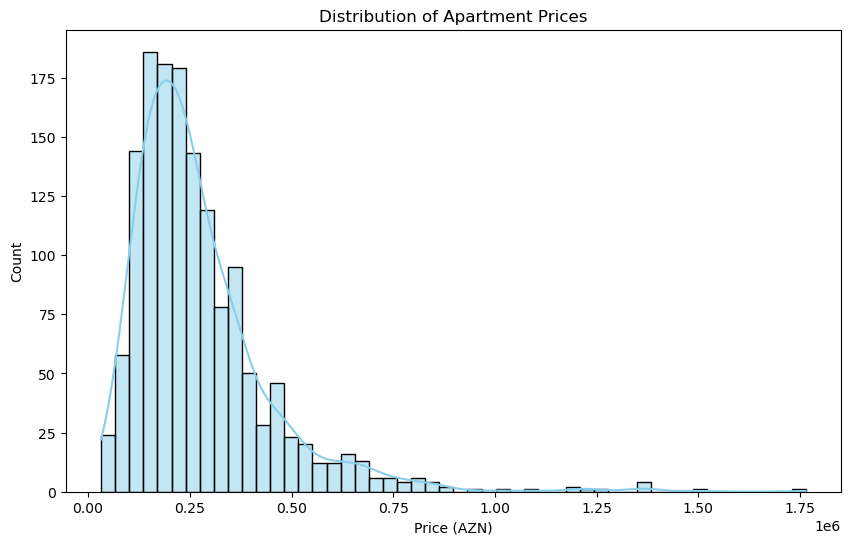

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Apartment Prices")
plt.xlabel("Price (AZN)")
plt.ylabel("Count")
plt.show()

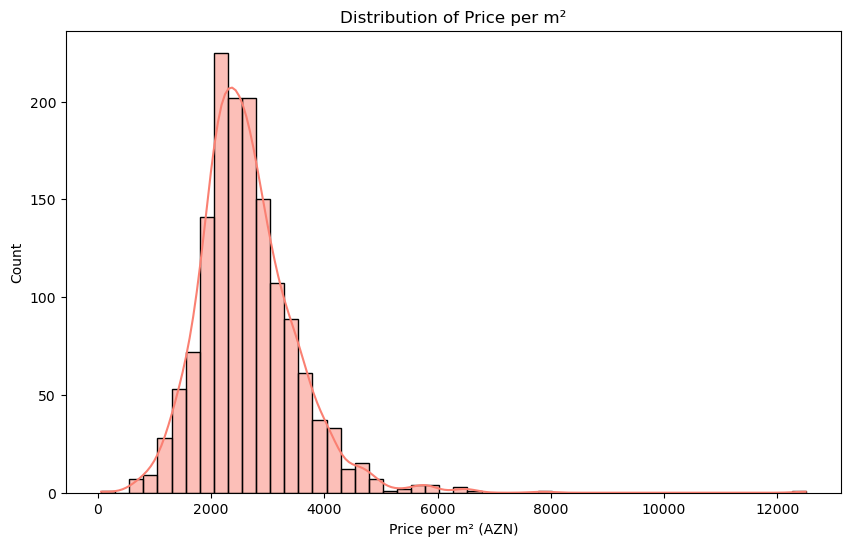

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_per_sqm'], bins=50, kde=True, color='salmon')
plt.title("Distribution of Price per m²")
plt.xlabel("Price per m² (AZN)")
plt.ylabel("Count")
plt.show()

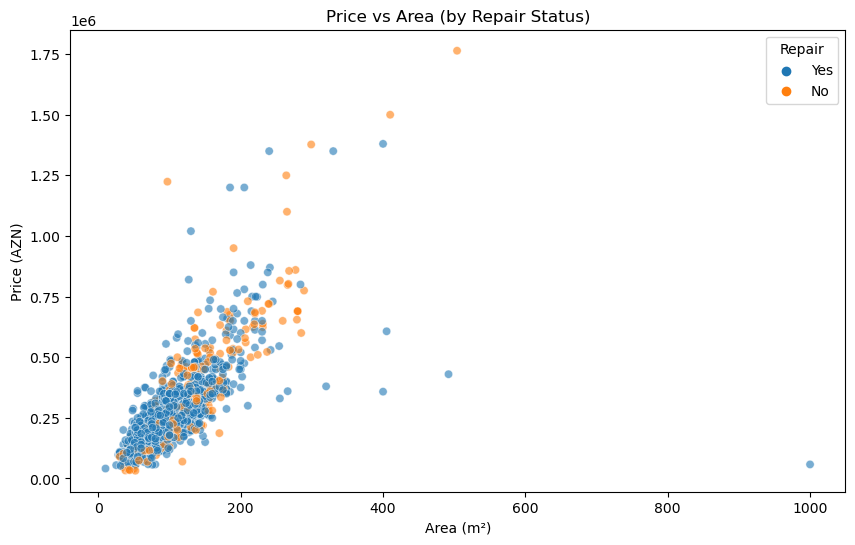

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area', y='Price', hue='Repair', alpha=0.6)
plt.title("Price vs Area (by Repair Status)")
plt.xlabel("Area (m²)")
plt.ylabel("Price (AZN)")
plt.show()

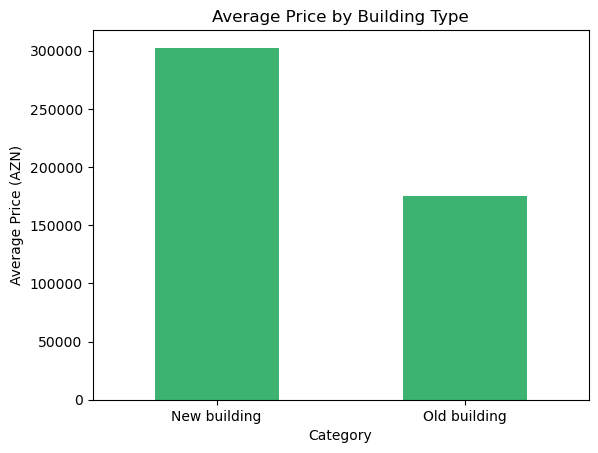

In [45]:
df.groupby('Category')['Price'].mean().plot(kind='bar', color='mediumseagreen')
plt.title("Average Price by Building Type")
plt.xlabel("Category")
plt.ylabel("Average Price (AZN)")
plt.xticks(rotation=0)
plt.show()

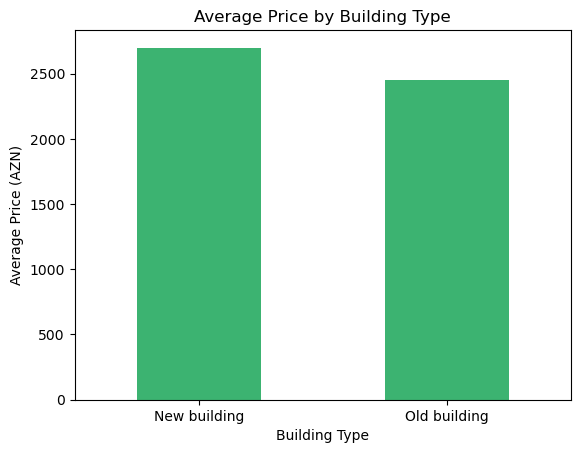

In [46]:
df.groupby('Category')['Price_per_sqm'].mean().plot(kind='bar', color='mediumseagreen')
plt.title("Average Price by Building Type")
plt.xlabel("Building Type")
plt.ylabel("Average Price (AZN)")
plt.xticks(rotation=0)
plt.show()

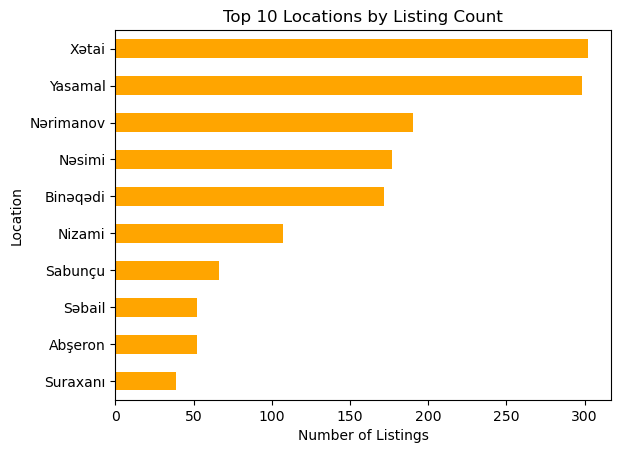

In [47]:
df['Region'].value_counts().head(10).plot(kind='barh', color='orange')
plt.title("Top 10 Locations by Listing Count")
plt.xlabel("Number of Listings")
plt.ylabel("Location")
plt.gca().invert_yaxis()
plt.show()

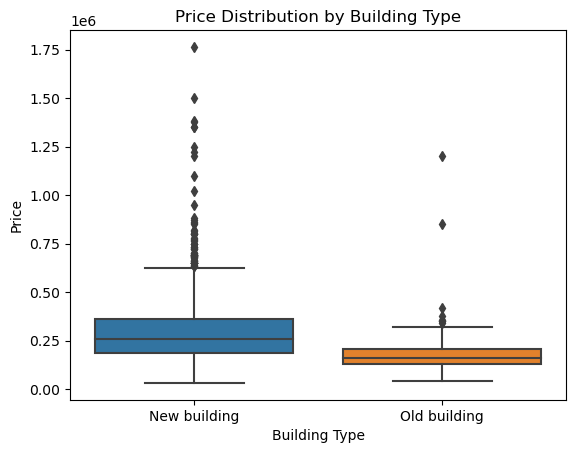

In [48]:
sns.boxplot(data=df, x='Category', y='Price')
plt.title("Price Distribution by Building Type")
plt.xlabel("Building Type")
plt.ylabel("Price")
plt.show()

In [49]:
region_avg_price = df.groupby('Region')['Price_per_sqm'].mean().round(2).sort_values(ascending=False).reset_index()
print(region_avg_price)

       Region  Price_per_sqm
0     Sabunçu        3025.82
1     Qaradağ        2982.08
2      Səbail        2930.19
3   Nərimanov        2923.37
4      Nəsimi        2753.33
5       Xətai        2681.07
6    Binəqədi        2656.95
7     Yasamal        2654.87
8      Nizami        2370.84
9    Suraxanı        1812.05
10    Abşeron        1284.60
11  Pirallahı         800.00


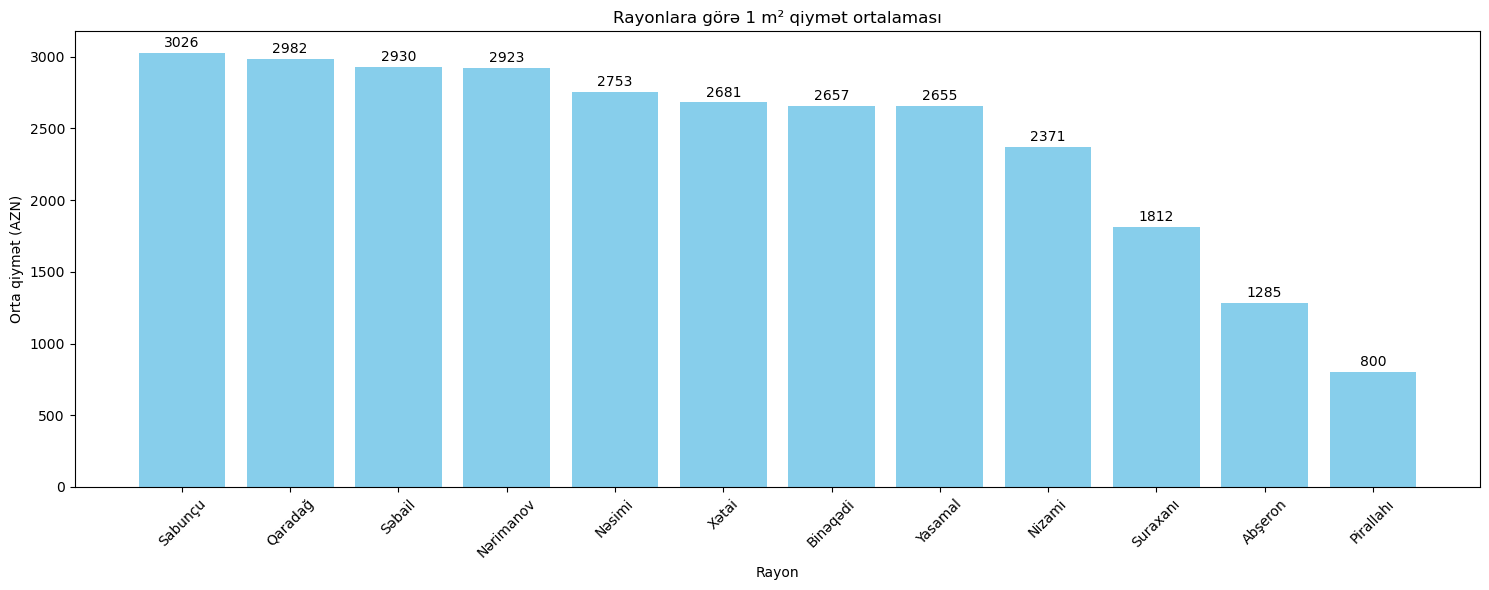

In [50]:
plt.figure(figsize=(15, 6))
bars = plt.bar(region_avg_price['Region'], region_avg_price['Price_per_sqm'], color='skyblue')
plt.title('Rayonlara görə 1 m² qiymət ortalaması')
plt.ylabel('Orta qiymət (AZN)')
plt.xlabel('Rayon')
plt.xticks(rotation=45)

# Qiymətləri barların üstünə yaz
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, f'{yval:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

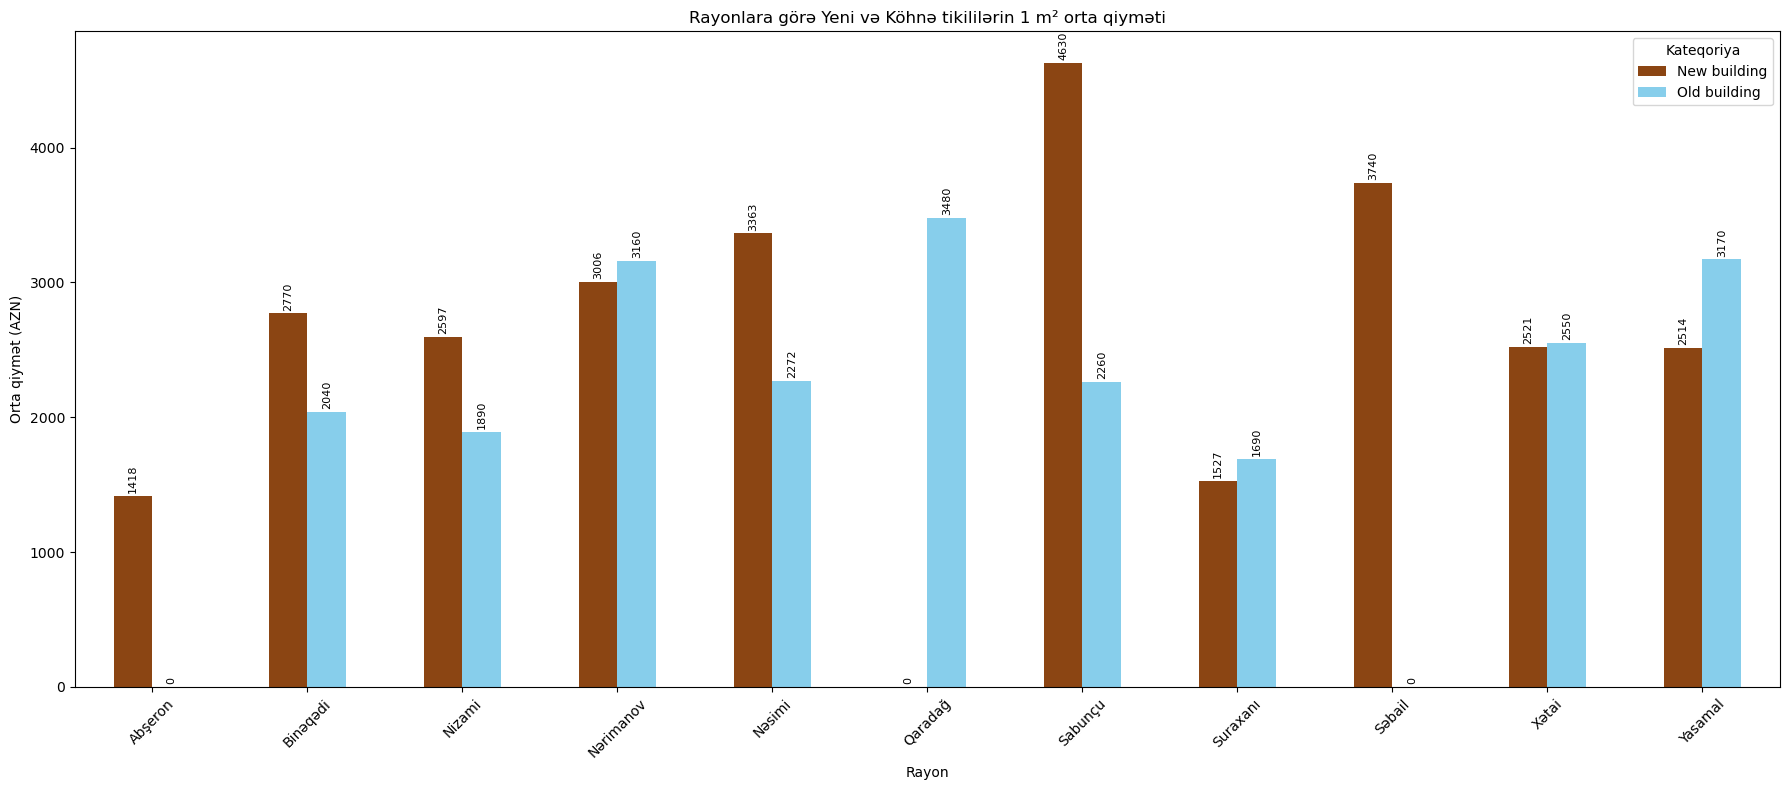

In [50]:
grouped = df.groupby(['Region', 'Category'])['Price per sqm'].mean().reset_index()

# 2. Pivot et
pivot_table = grouped.pivot(index='Region', columns='Category', values='Price per sqm')

# 3. Çək
ax = pivot_table.plot(kind='bar', figsize=(18,8), color=['saddlebrown', 'skyblue'])

plt.title('Rayonlara görə Yeni və Köhnə tikililərin 1 m² orta qiyməti')
plt.ylabel('Orta qiymət (AZN)')
plt.xlabel('Rayon')
plt.xticks(rotation=45)
plt.legend(title='Kateqoriya')
plt.tight_layout()

# Qiymətləri barların üstünə yaz
for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        if not pd.isna(height):  # NaN-ları atla
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 20,  # yuxarıya çək
                f'{height:.0f}',
                ha='center',
                va='bottom',
                fontsize=8,
                rotation=90
            )


In [51]:
repair_avg_price = df.groupby('Repair')['Price_per_sqm'].mean().round(2).sort_values(ascending=False).reset_index()
repair_avg_price

,Repair,Price_per_sqm
0,No,2676.36
1,Yes,2637.19


In [52]:
document_avg_price = df.groupby('Document')['Price_per_sqm'].mean().round(2).sort_values(ascending=False).reset_index()
document_avg_price

,Document,Price_per_sqm
0,No,2833.18
1,Yes,2581.66


In [53]:
df_metro = df[df['Address'].str.contains('m\.', na=False)]
df_metro

,Link,Category,Floors,Area,Room_Count,Document,Repair,Price,Price_per_sqm,Date,Address,Flat_Floor,Total_Floors,Region,calculated_price_per_m2,Difference
1,https://bina.az/items/5178536,New building,2 / 16,146.0,3,Yes,Yes,310000,2120,2025-05-19,Azadlıq Prospekti m.,2,16,Binəqədi,2123,-3
2,https://bina.az/items/5079141,New building,6 / 15,86.0,3,Yes,Yes,245000,2850,2025-05-19,Neftçilər m.,6,15,Nizami,2849,1
4,https://bina.az/items/4960469,New building,6 / 17,142.0,3,Yes,Yes,489000,3440,2025-05-19,Nəriman Nərimanov m.,6,17,Nərimanov,3444,-4
5,https://bina.az/items/4701438,New building,12 / 16,88.0,3,Yes,Yes,350000,3980,2025-05-19,Nizami m.,12,16,Yasamal,3977,3
6,https://bina.az/items/4269282,Old building,5 / 5,83.0,3,Yes,Yes,150000,1810,2025-05-19,İnşaatçılar m.,5,5,Yasamal,1807,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,https://bina.az/items/5214820,Old building,9 / 9,76.0,3,Yes,Yes,210000,2760,2025-05-19,Elmlər Akademiyası m.,9,9,Yasamal,2763,-3
1946,https://bina.az/items/5179045,New building,10 / 18,180.0,4,Yes,Yes,465000,2580,2025-05-19,Elmlər Akademiyası m.,10,18,Yasamal,2583,-3
1947,https://bina.az/items/5214818,New building,12 / 17,140.0,3,Yes,Yes,419000,2990,2025-05-19,Gənclik m.,12,17,Nərimanov,2993,-3
1951,https://bina.az/items/5199463,New building,12 / 16,160.0,3,Yes,Yes,400000,2500,2025-05-19,Şah İsmayıl Xətai m.,12,16,Xətai,2500,0


In [54]:
metro_avg = df_metro.groupby('Address')['Price_per_sqm'].mean().round(2).sort_values(ascending=False).reset_index()
metro_avg

,Address,Price_per_sqm
0,Sahil m.,3448.33
1,Bakmil m.,3370.00
2,İçəri Şəhər m.,3216.52
3,28 May m.,3167.12
4,Nizami m.,3113.09
5,Şah İsmayıl Xətai m.,3001.42
6,Nəriman Nərimanov m.,2950.00
7,Elmlər Akademiyası m.,2932.82
8,Gənclik m.,2875.87
9,8 Noyabr m.,2678.33


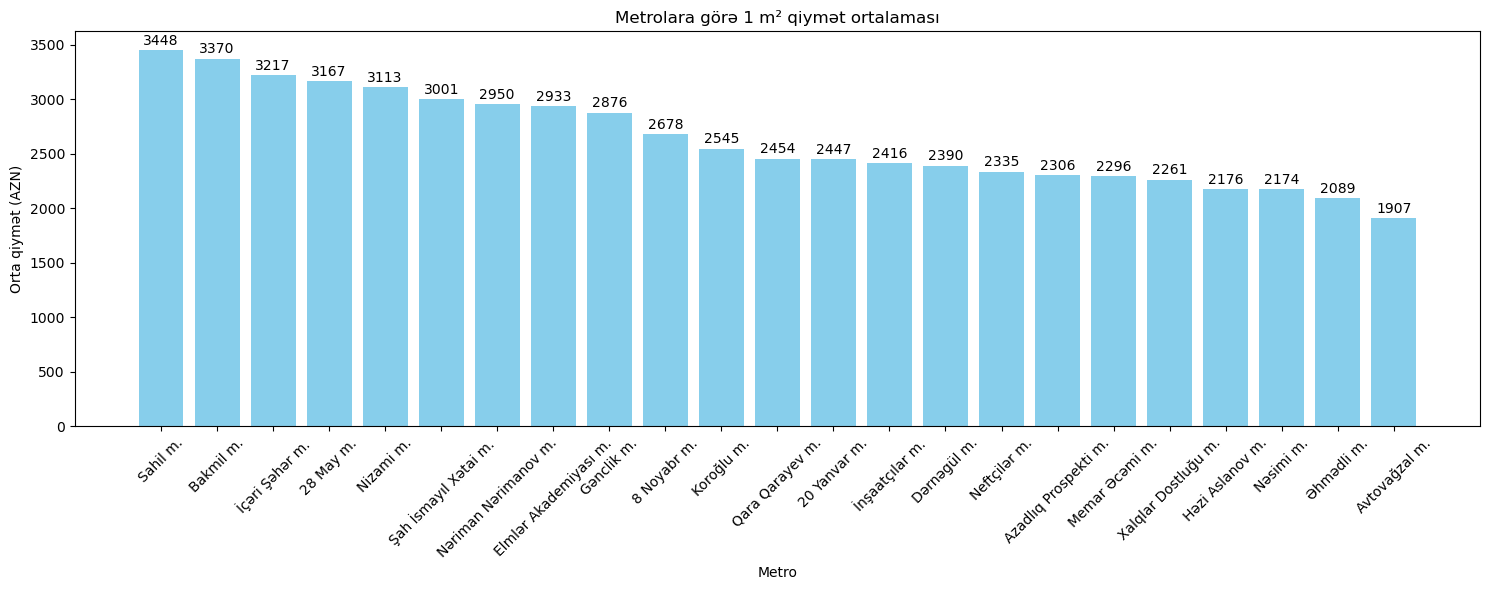

In [55]:
plt.figure(figsize=(15, 6))
bars = plt.bar(metro_avg['Address'], metro_avg['Price_per_sqm'], color='skyblue')
plt.title('Metrolara görə 1 m² qiymət ortalaması')
plt.ylabel('Orta qiymət (AZN)')
plt.xlabel('Metro')
plt.xticks(rotation=45)

# Qiymətləri barların üstünə yaz
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, f'{yval:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

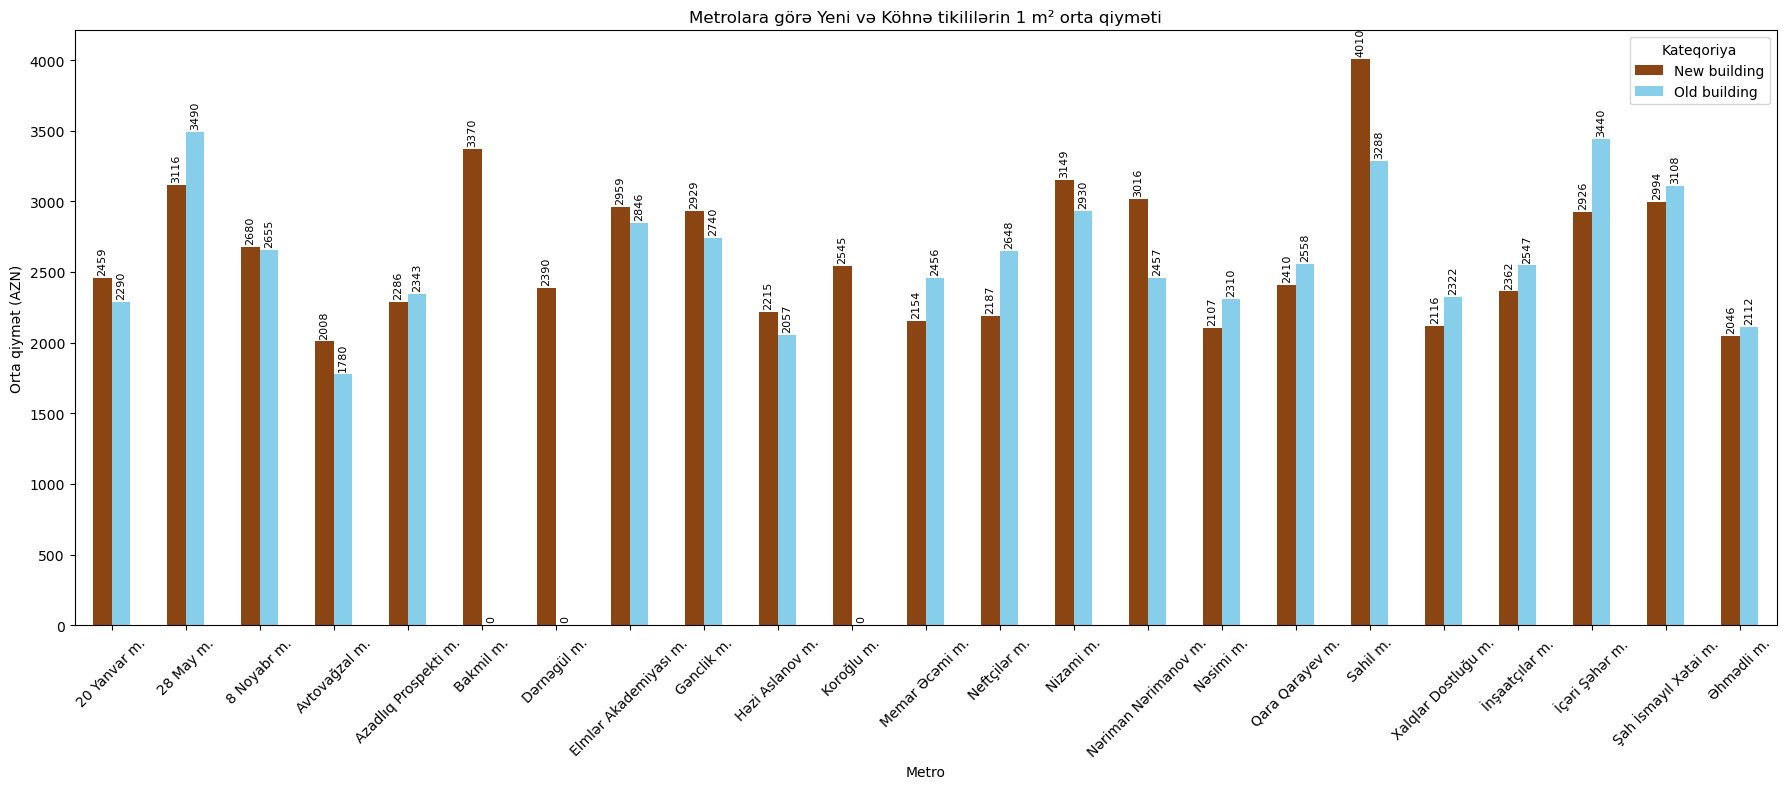

In [56]:
# 1. Qrupla və ortalama al
grouped_metro = df_metro.groupby(['Address', 'Category'])['Price_per_sqm'].mean().reset_index()

# 2. Pivot et
pivot_metro = grouped_metro.pivot(index='Address', columns='Category', values='Price_per_sqm')

# 3. Çək
import matplotlib.pyplot as plt

# Bar chart çək
ax = pivot_metro.plot(kind='bar', figsize=(18,8), color=['saddlebrown', 'skyblue'])

plt.title('Metrolara görə Yeni və Köhnə tikililərin 1 m² orta qiyməti')
plt.ylabel('Orta qiymət (AZN)')
plt.xlabel('Metro')
plt.xticks(rotation=45)
plt.legend(title='Kateqoriya')
plt.tight_layout()

# Qiymətləri barların üstünə yaz
for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        if not pd.isna(height):  # NaN-ları atla
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 20,  # yuxarıya çək
                f'{height:.0f}',
                ha='center',
                va='bottom',
                fontsize=8,
                rotation=90
            )

plt.show()